In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal.windows as windows

from scipy.fft import fft, fftshift, ifft, ifftshift, fftfreq
from scipy.constants import c, pi

matplotlib.style.use('bmh')

In [3]:
rx_buffer1 = np.load("rx_buffer_2_300_310_1_run_1.npy")
rx_buffer2 = np.load("rx_buffer_2_300_310_1_run_1.npy")

In [4]:
fs = 2e6
LOs = np.unique(rx_buffer1[:,1])
nsp = len(LOs)
N = min(rx_buffer1[rx_buffer1[:, 1] == LOs[i], 0].shape[0] for i in range(nsp))
N2 = int(N/2)
Nf = N*nsp
W = windows.tukey(N)

In [5]:
dft_stack = np.zeros(Nf*2, dtype = np.complex128)

for i in range(nsp):

    # Initializing reference waveform
    ref_chirp = rx_buffer1[rx_buffer1[:,1]==LOs[i], 0][0:N]
    rx_chirp = rx_buffer2[rx_buffer1[:,1]==LOs[i], 0][0:N]

    # FFTs and FFTshift to center at 0Hz
    ref_dft = fftshift(fft(ref_chirp*W))
    rx_dft = fftshift(fft(rx_chirp*W))

    freqs = fftshift(fftfreq(N, 1/fs)) #Frequency range

    mf_dft = ref_dft * np.conjugate(rx_dft)

    #Seperate matched filter into real and imaginary components
    dft_real = mf_dft[:N2]
    dft_imag = mf_dft[N2:]
    
    #Sufficiently pad each side
    dft_real_pad = np.pad(dft_real, (Nf, Nf-N2), mode = 'constant', constant_values = (0,0))
    dft_imag_pad = np.pad(dft_imag, (Nf-N2, Nf), mode = 'constant', constant_values = (0,0))
    
    #Perform a circular shift corresponding to the frequency spacing between broadband pulses
    dft_real_shift = np.roll(dft_real_pad, int(i*len(mf_dft)/2))
    dft_imag_shift = np.roll(dft_imag_pad, -int(i*len(mf_dft)/2))
    
    #Add to the stack array and repeat
    dft_stack += dft_real_shift
    dft_stack += dft_imag_shift

/tmp/ipykernel_5298/1410058166.py:1: RuntimeWarning: divide by zero encountered in log10
  mag_stack = 20*np.log10(np.abs(dft_stack/np.max(dft_stack))**2)


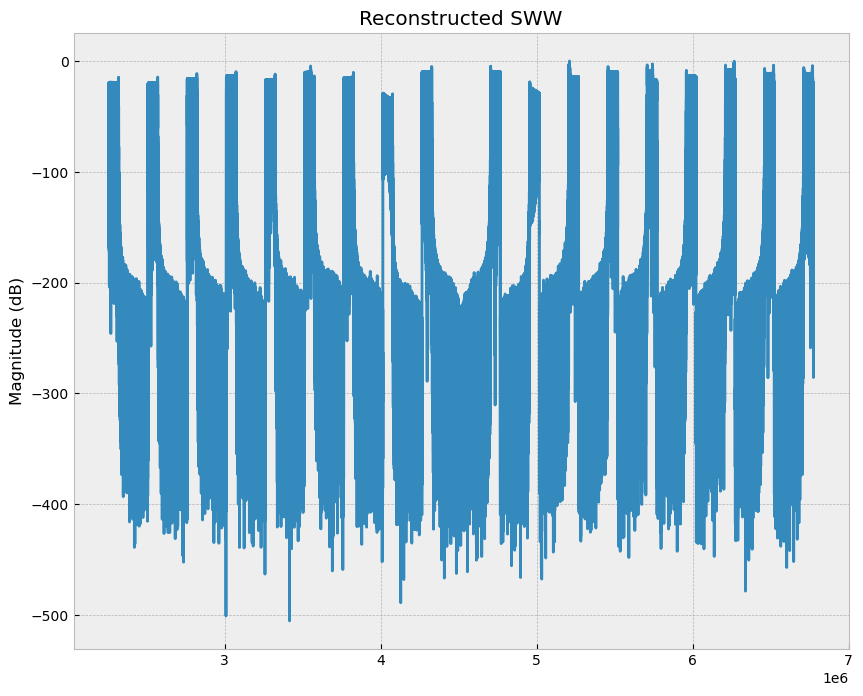

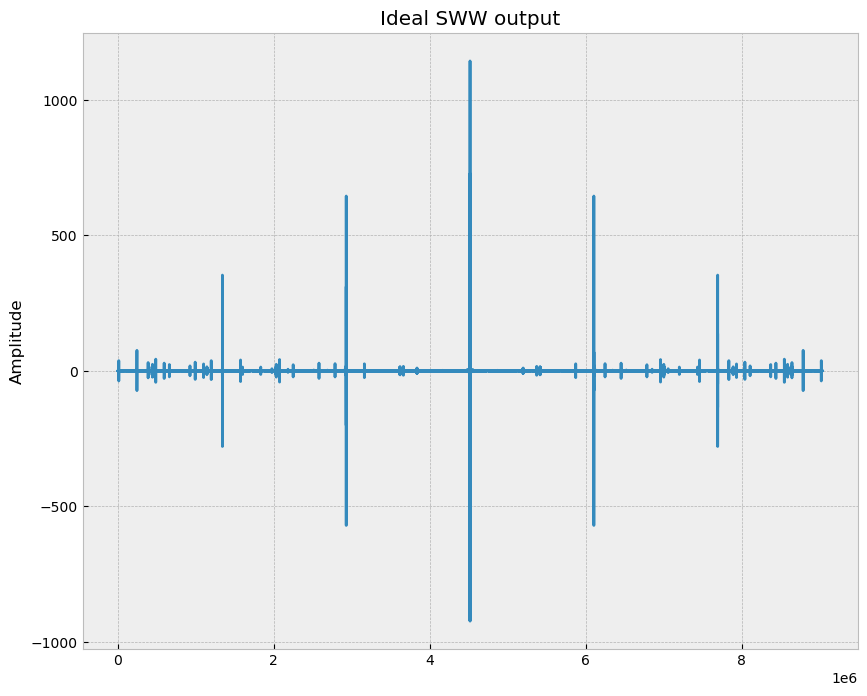

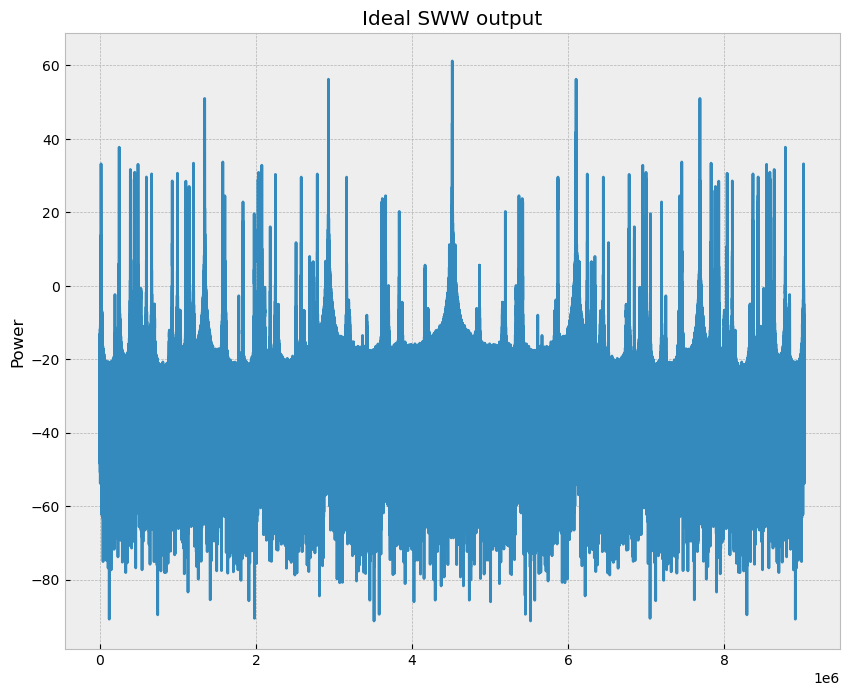

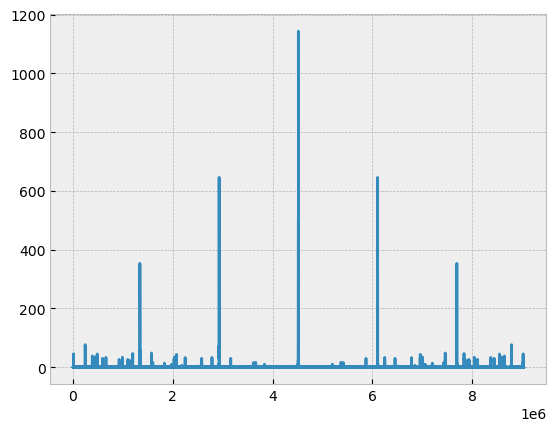

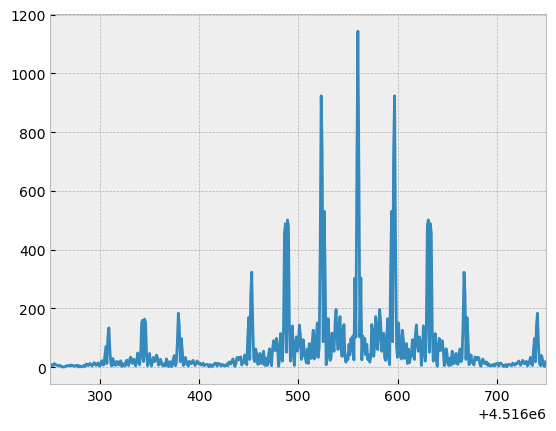

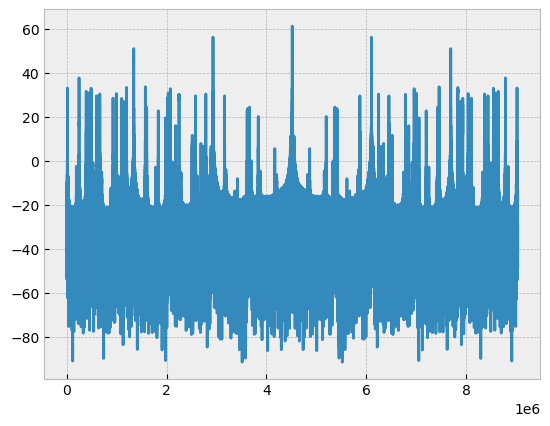

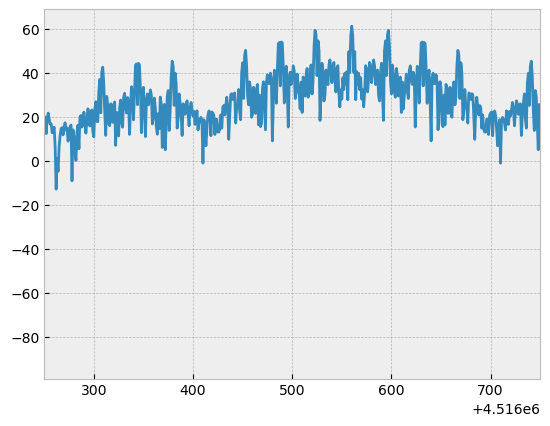

In [13]:
mag_stack = 20*np.log10(np.abs(dft_stack/np.max(dft_stack))**2)

#N2 = int(N/2)
#freqs_stack = np.linspace(-Bi*nsp, Bi*nsp, num=len(mag_stack))

f, ax = plt.subplots(figsize = (10,8))

ax.plot(mag_stack)

#ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Magnitude (dB)")

ax.set_title("Reconstructed SWW")

plt.show()

sww = ifftshift(ifft(dft_stack)) #Ifft

f, ax = plt.subplots(figsize = (10,8))

ax.plot(sww)
#ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Ideal SWW output")

plt.show()

p = 20*np.log10(np.abs(sww))

f, ax = plt.subplots(figsize = (10,8))

ax.plot(p)
#ax.set_xlabel("Time (s)")
ax.set_ylabel("Power")
ax.set_title("Ideal SWW output")

plt.show()

plt.plot(np.abs(sww))
plt.show()

plt.plot(np.abs(sww))
plt.xlim(4.51625e6,4.51675e6)
plt.show()

plt.plot(p)
plt.show()

plt.plot(p)
plt.xlim(4.51625e6,4.51675e6)
plt.show()